<a href="https://colab.research.google.com/github/audreynk/KomputasiIntelegensia/blob/main/EndTermTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk menormalkan data sehingga berada dalam rentang tertentu, umumnya [0, 1].
from sklearn.preprocessing import MinMaxScaler

# Untuk menghitung MAE antara nilai yang diprediksi dan nilai sebenarnya.
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Untuk membangun dan melatih model Deep Learning. Keras adalah API high-level untuk TensorFlow.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load Dataset

In [ ]:
df=pd.read_csv("AMZN_Stock_Updated_V2.csv")
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2000-01-03,4.075000,4.478125,3.952344,4.468750,322352000
1,1,2000-01-04,4.268750,4.575000,4.087500,4.096875,349748000
2,2,2000-01-05,3.525000,3.756250,3.400000,3.487500,769148000
3,3,2000-01-06,3.565625,3.634375,3.200000,3.278125,375040000
4,4,2000-01-07,3.350000,3.525000,3.309375,3.478125,210108000


# Data Preprocessing

In [ ]:
# Drop kolom 'Unnamed: 0'

df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
# Menjadi kolom 'date' sebagai index DataFrame
df.set_index('Date',inplace = True)

# Menyortir data berdasarkan tanggal
df.index =  pd.to_datetime(df.index,format='%Y-%m-%d')

In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,4.075000,4.478125,3.952344,4.468750,322352000
2000-01-04,4.268750,4.575000,4.087500,4.096875,349748000
2000-01-05,3.525000,3.756250,3.400000,3.487500,769148000
2000-01-06,3.565625,3.634375,3.200000,3.278125,375040000
2000-01-07,3.350000,3.525000,3.309375,3.478125,210108000


# Data Visualization

Text(0.5, 1.0, 'Anazon Stock at all time')

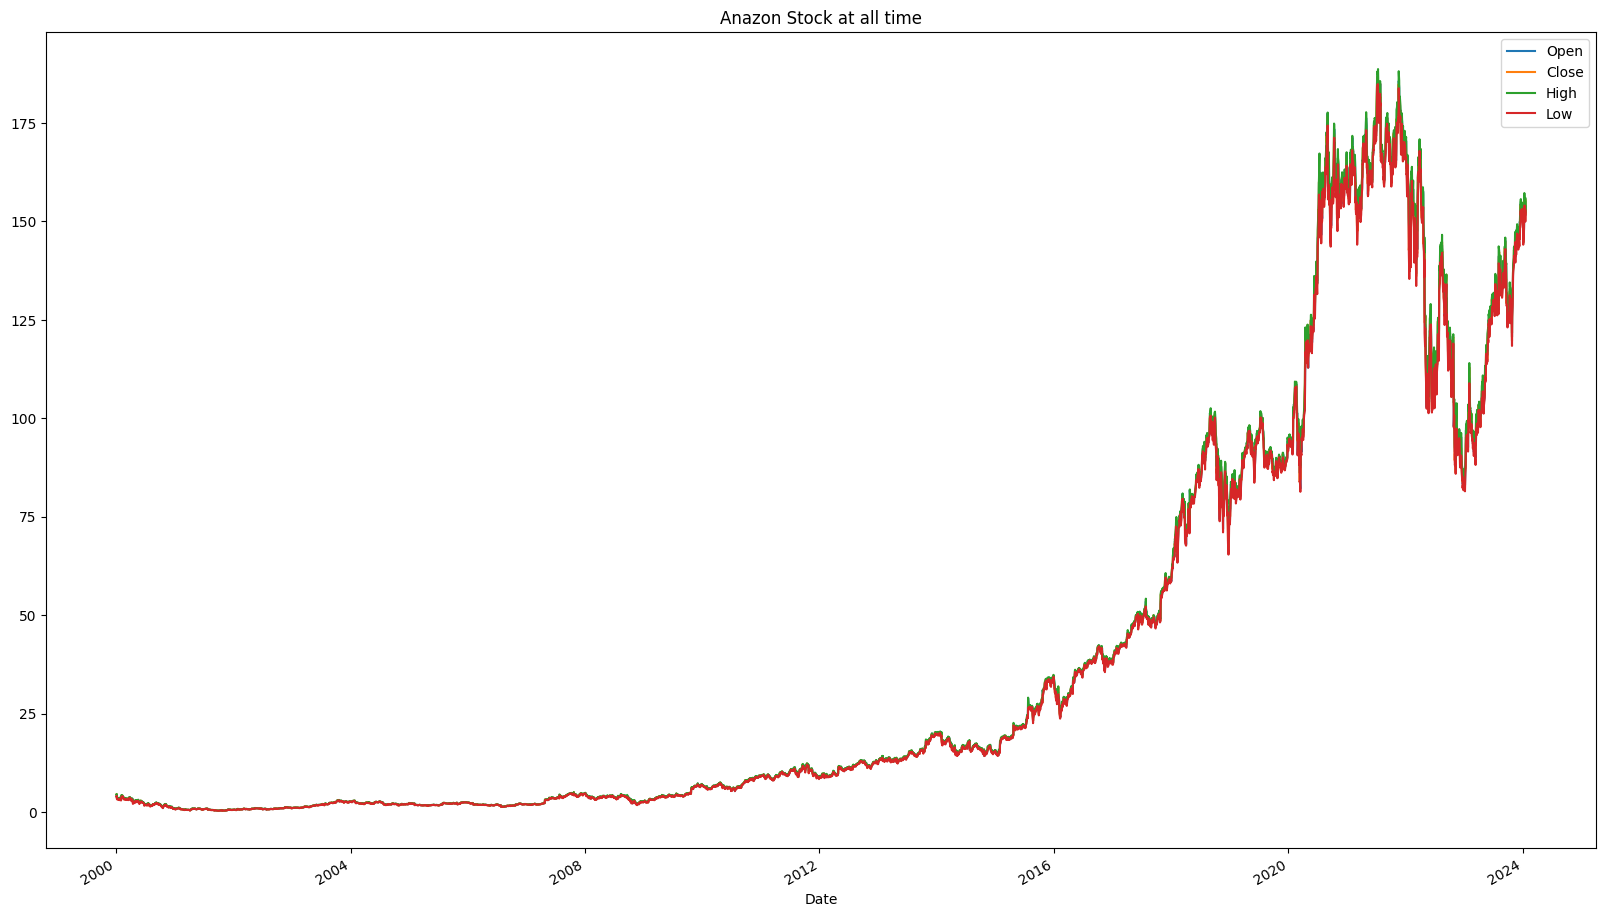

In [ ]:
df[['Open','Close','High','Low']].plot(figsize = (20,12))
plt.title('Anazon Stock at all time')

Text(0, 0.5, 'Stock action')

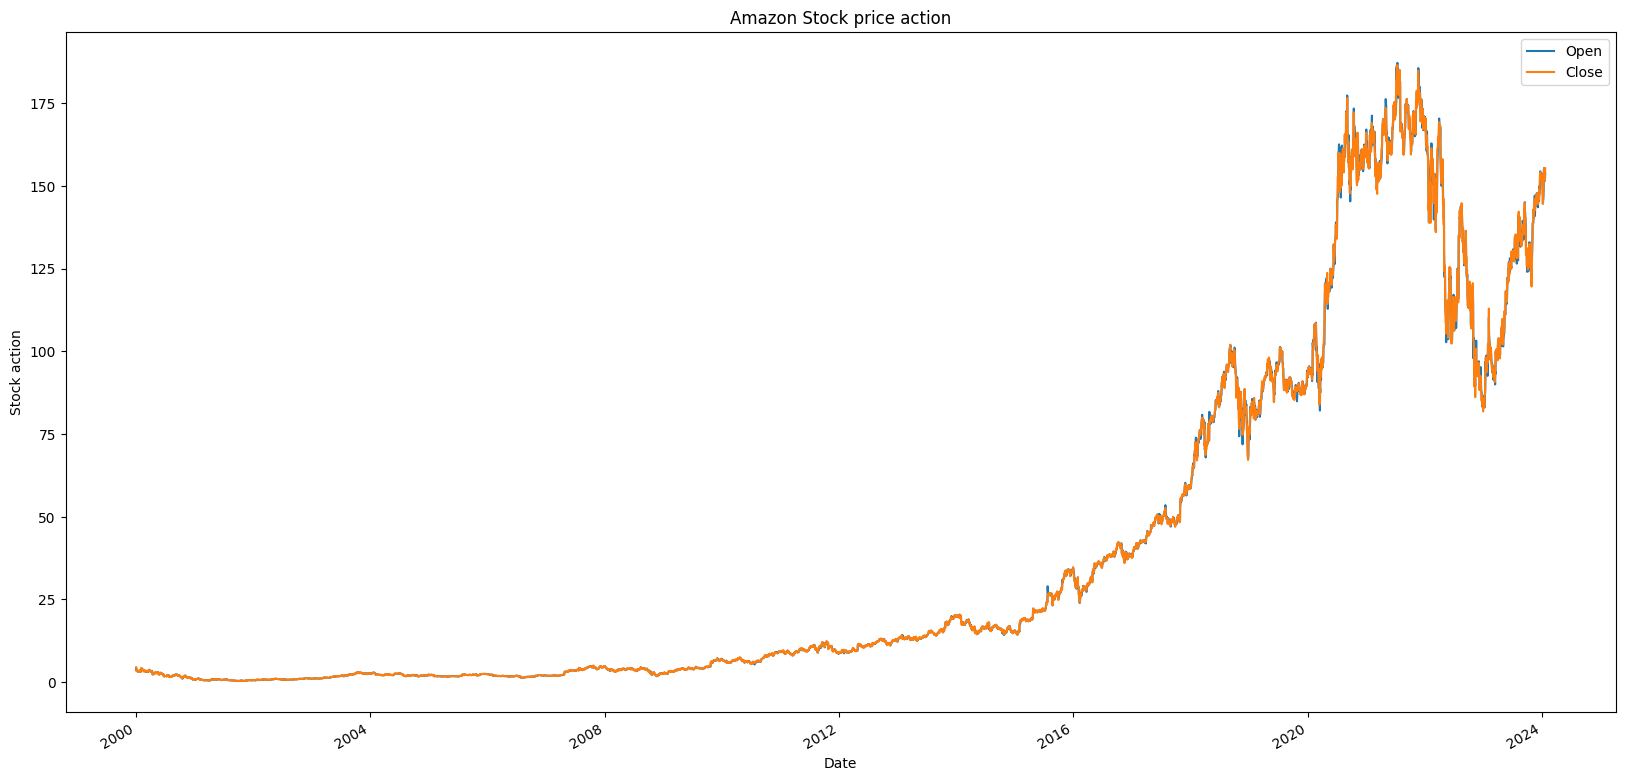

In [ ]:
df[['Open','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

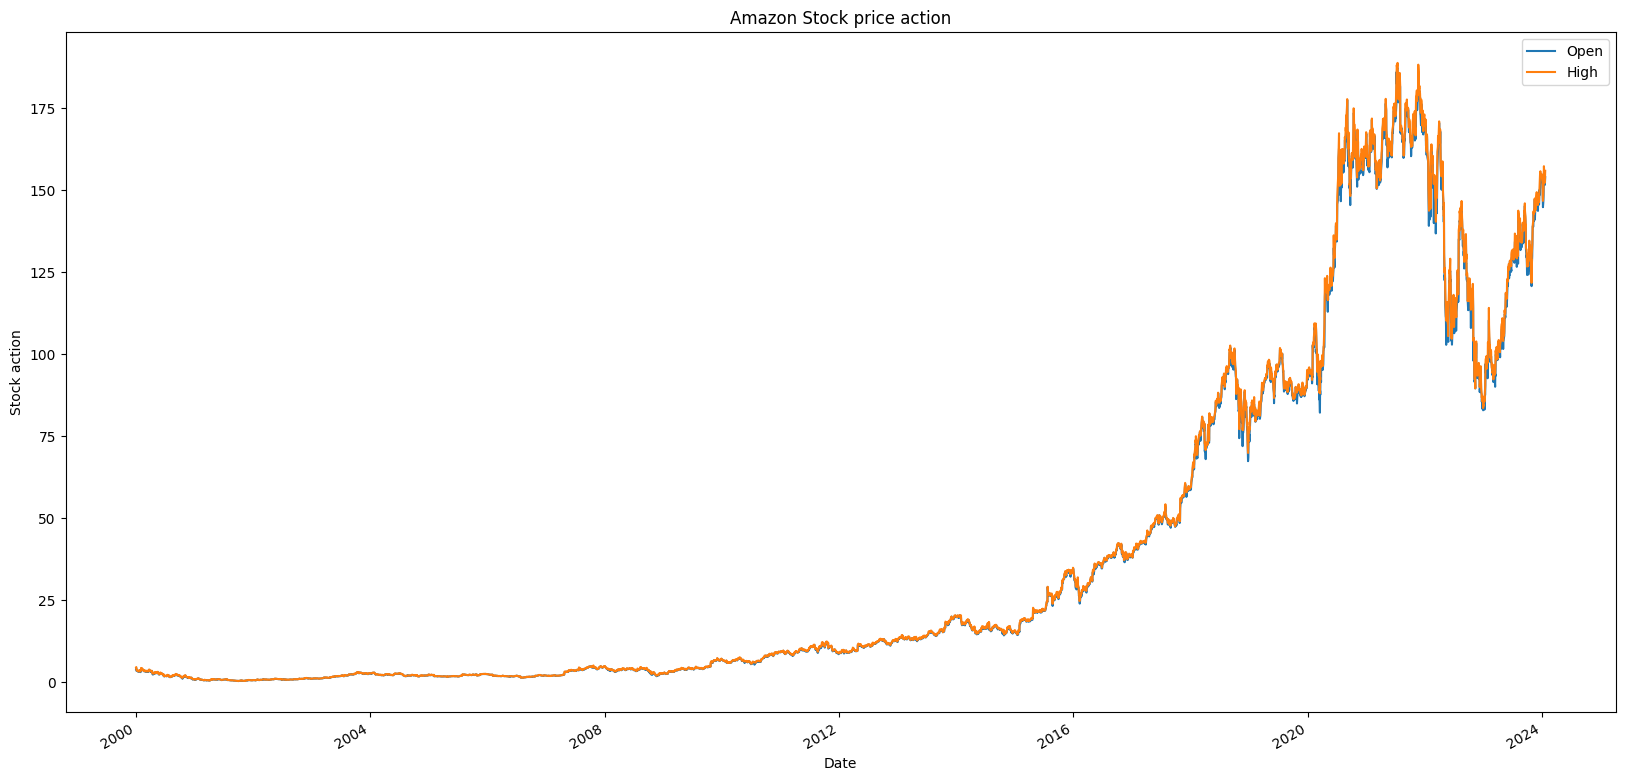

In [ ]:
df[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

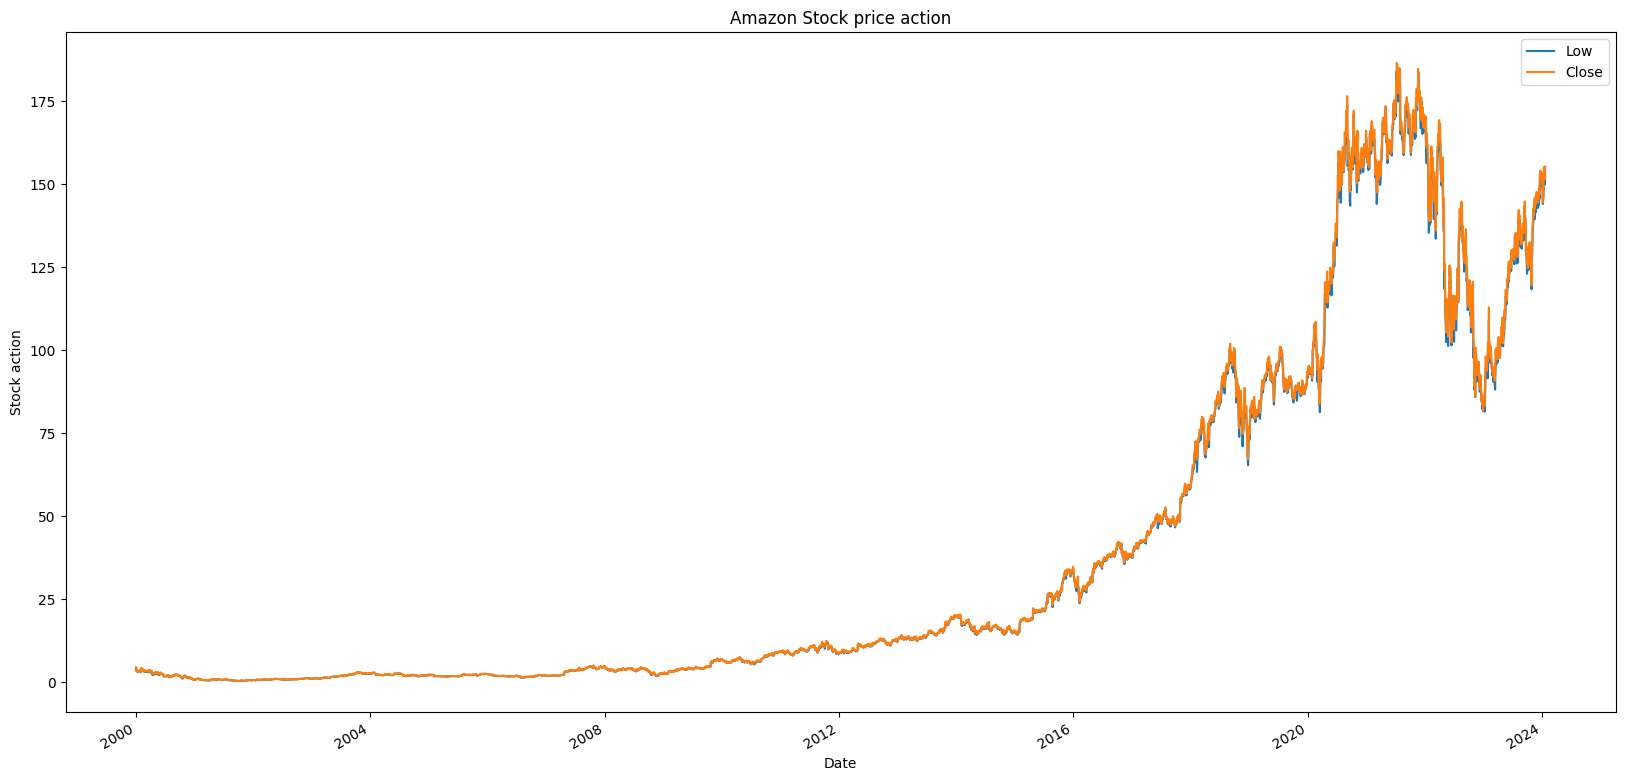

In [ ]:
df[['Low','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

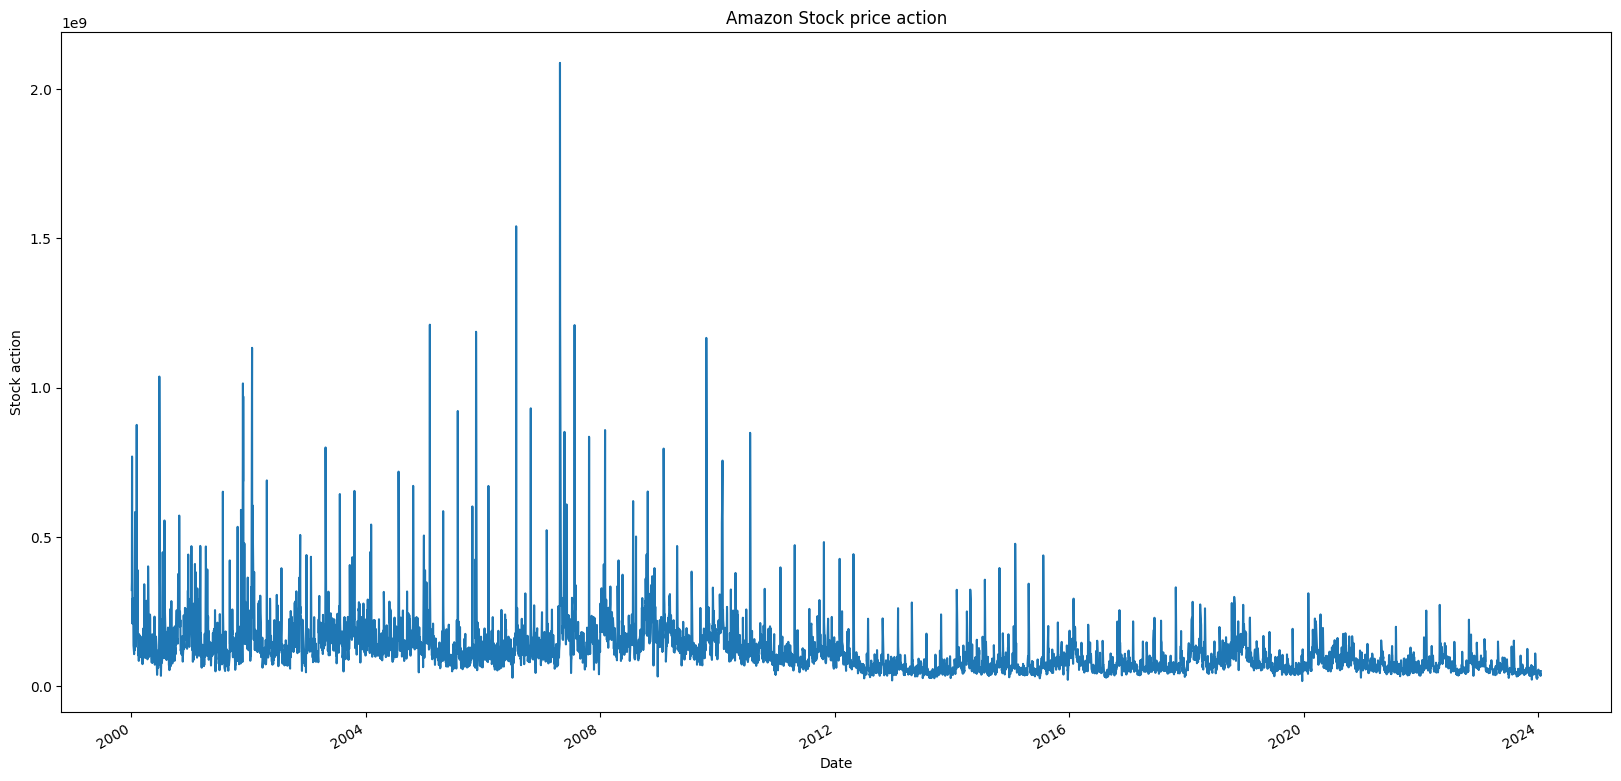

In [ ]:
df['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

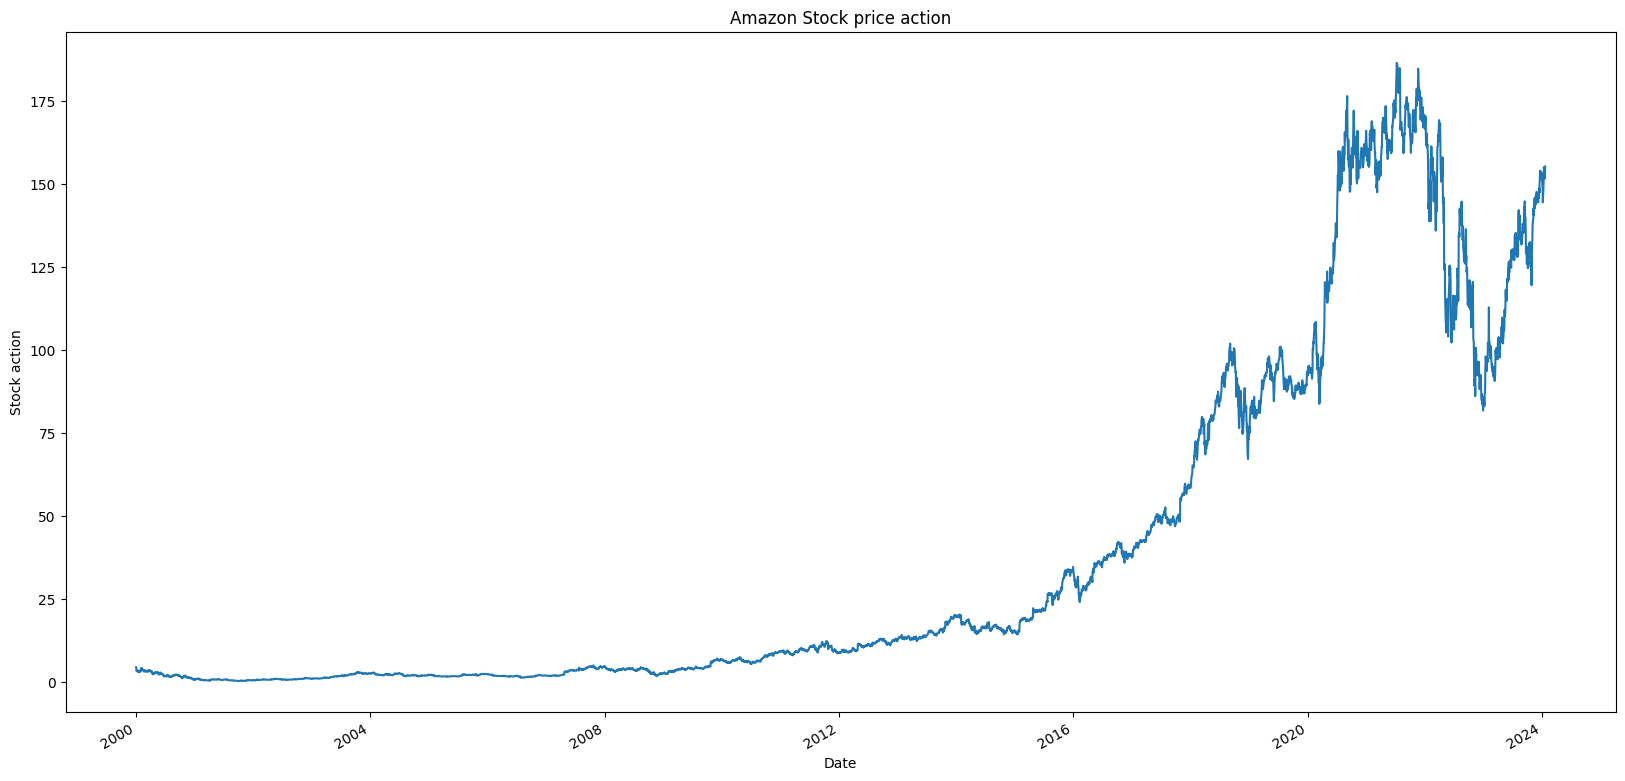

In [ ]:
df['Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

From the previous analysis and visualization, it can take data from 2000 as the previous years doesn't important, not have a stock price variance

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2024')

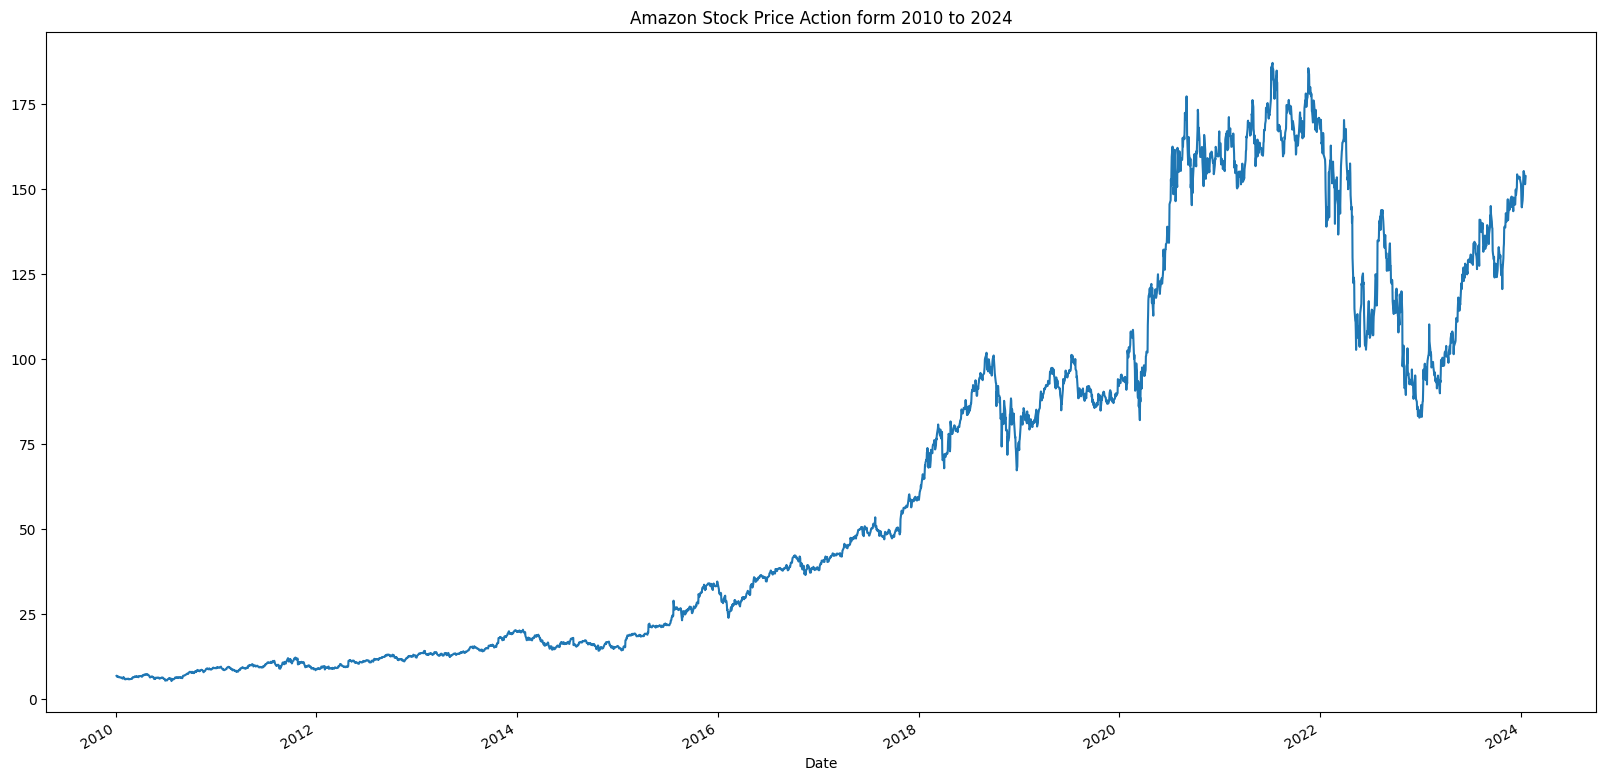

In [ ]:
Ama = df['2010':'2024']


Ama['Open'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2024')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2024')

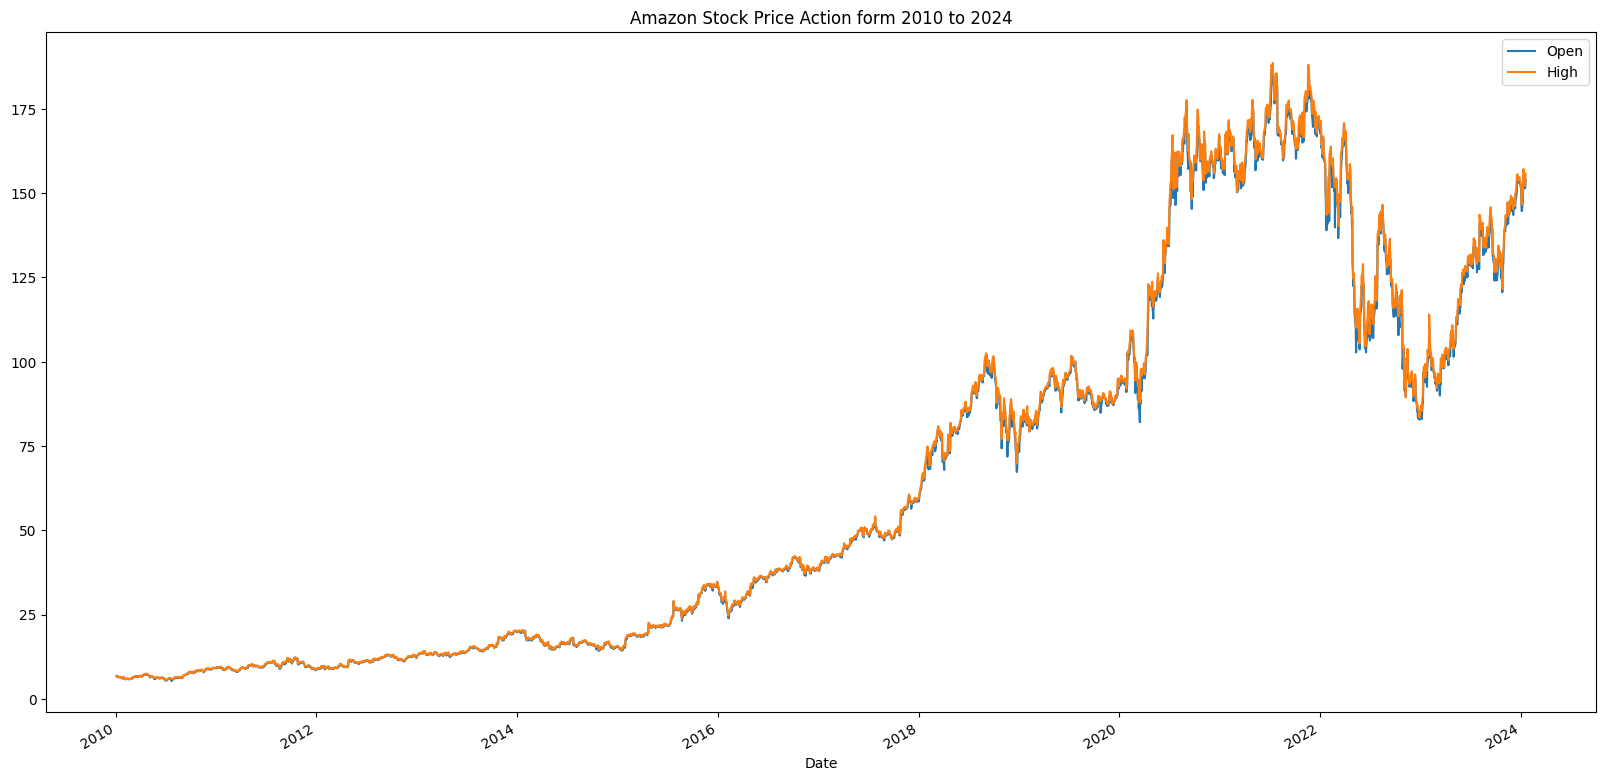

In [ ]:
Ama[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2024')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2024')

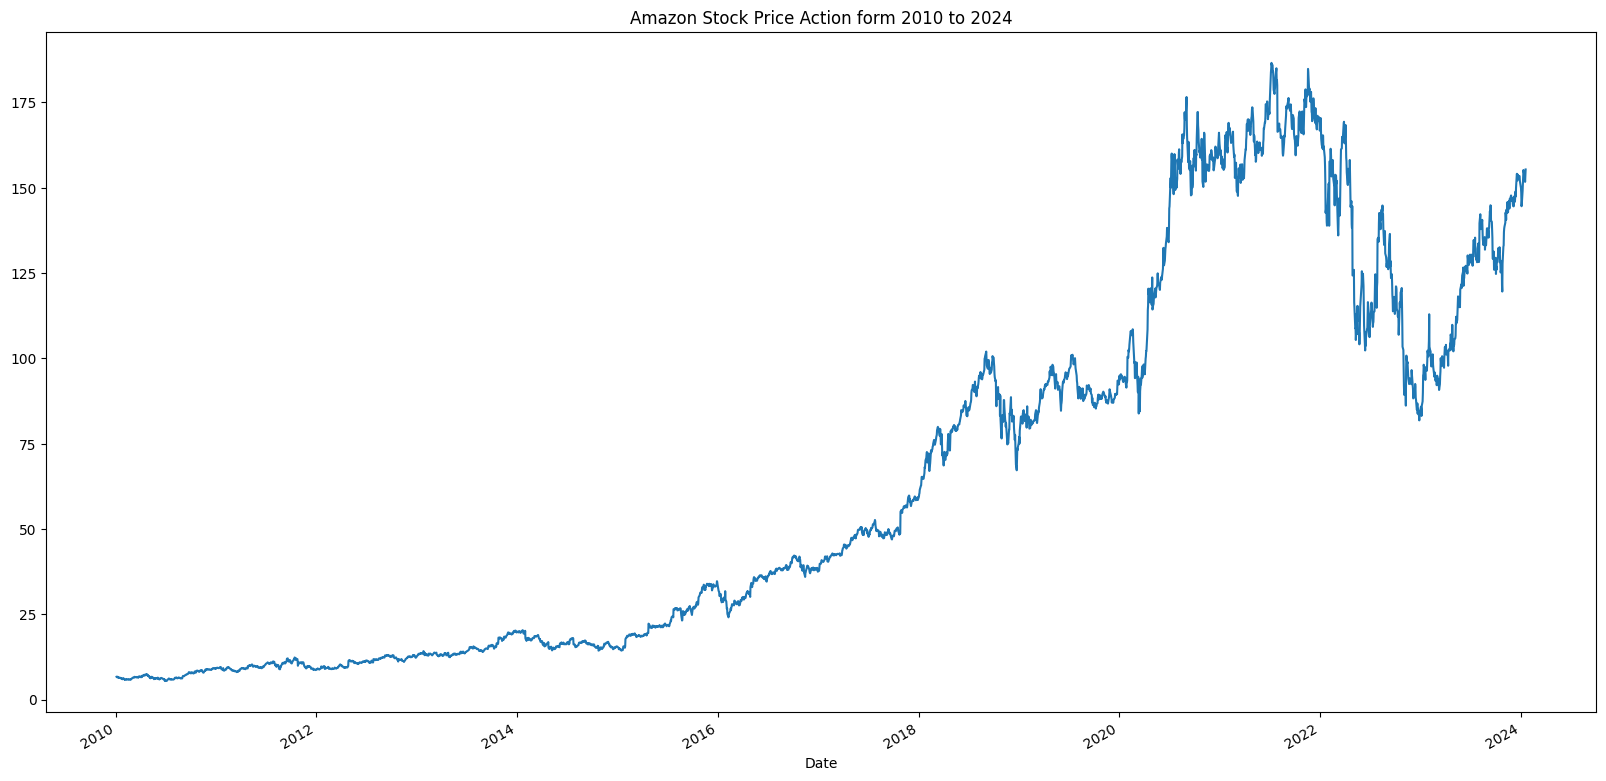

In [ ]:
Ama['Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2024')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2024')

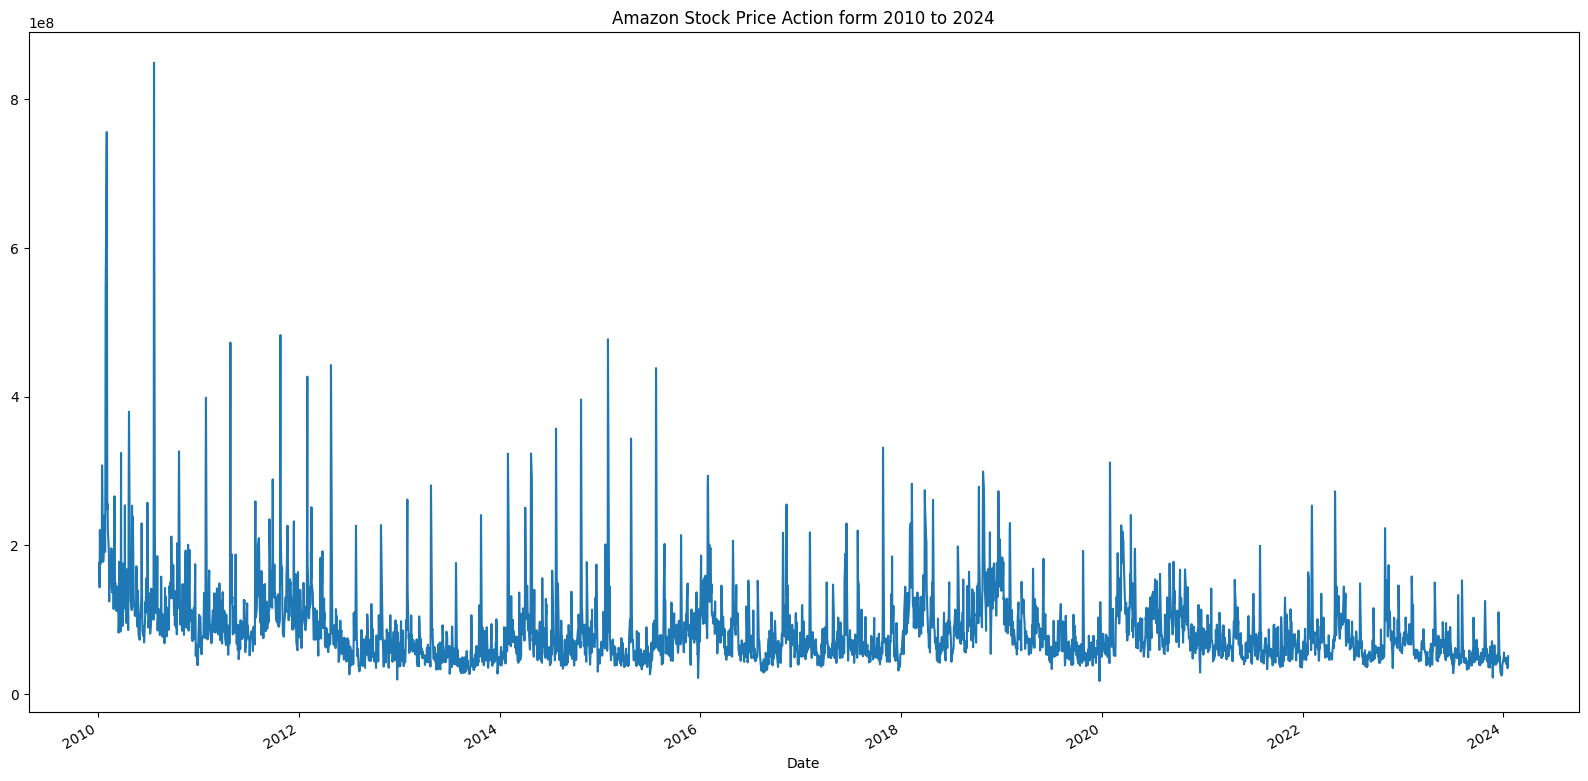

In [ ]:
Ama['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2024')

In [ ]:
Ama.describe()

,Open,High,Low,Close,Volume
count,3535.000000,3535.000000,3535.000000,3535.000000,3.535000e+03
mean,63.685713,64.426066,62.880988,63.669679,8.608715e+07
std,54.957900,55.617911,54.239931,54.924999,5.199366e+07
min,5.296500,5.564500,5.290000,5.430500,1.762600e+07
25%,14.206750,14.309000,14.064750,14.200500,5.454300e+07
50%,41.191002,41.507000,40.978001,41.147999,7.251800e+07
75%,100.406750,101.320999,99.010002,100.214001,1.008930e+08
max,187.199997,188.654007,184.839493,186.570496,8.484220e+08


# Feature Scaling

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Ama['Close'].values.reshape(-1,1))

# Split Data into Train, Validation, and Test Sets

In [ ]:
train_Ama = Ama['High'].iloc[:-4]

X_train=[]
y_train=[]

for i in range(2, len(train_Ama)):
    X_train.append(train_Ama[i-2:i])
    y_train.append(train_Ama[i])

<ipython-input-18-2c970fb89ee4>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train.append(train_Ama[i])


In [ ]:
import math
train_len = math.ceil(len(train_Ama)*0.95)
train_len

3355

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building The LSTM Model

In [ ]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))



model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,701 (45.71 KB)

 Trainable params: 11,701 (45.71 KB)

 Non-trainable params: 0 (0.00 B)

## Fit The Model

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
111/111 - 3s - 25ms/step - loss: 1652.8597
Epoch 2/10
111/111 - 1s - 6ms/step - loss: 4.3604
Epoch 3/10
111/111 - 0s - 4ms/step - loss: 3.8018
Epoch 4/10
111/111 - 1s - 5ms/step - loss: 3.9133
Epoch 5/10
111/111 - 0s - 2ms/step - loss: 3.9365
Epoch 6/10
111/111 - 0s - 3ms/step - loss: 3.9479
Epoch 7/10
111/111 - 0s - 3ms/step - loss: 3.9773
Epoch 8/10
111/111 - 0s - 2ms/step - loss: 3.9210
Epoch 9/10
111/111 - 0s - 3ms/step - loss: 3.8318
Epoch 10/10
111/111 - 0s - 3ms/step - loss: 3.8484


<Axes: >

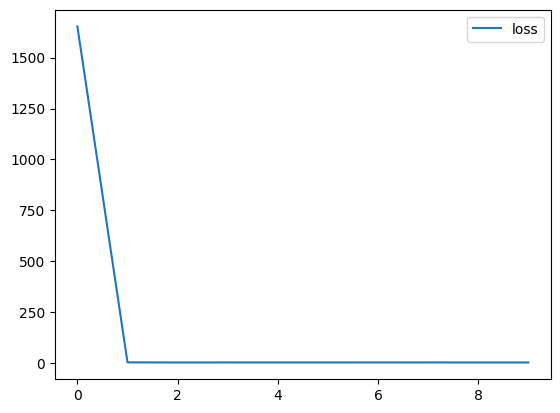

In [ ]:
# Plotting the training loss
losses = pd.DataFrame(model.history.history)
losses[['loss']].plot()

In [ ]:
test_data = train_Ama[train_len-2:]
X_val=[]
Y_val=[]

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

<ipython-input-24-eb7f02471273>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_val.append(test_data[i])


In [ ]:
# Preparing the test data
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
prediction = model.predict(X_val)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


# Making Predictions

In [ ]:
lstm_valid_pred = model.predict(X_val)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Calculating RMSE

print('Validation RMSE:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Validation RMSE: 2.5603009455849626


In [ ]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train rmse: 1.895007488955182
Validation rmse: 2.5603009455849626


# Visualize the Results

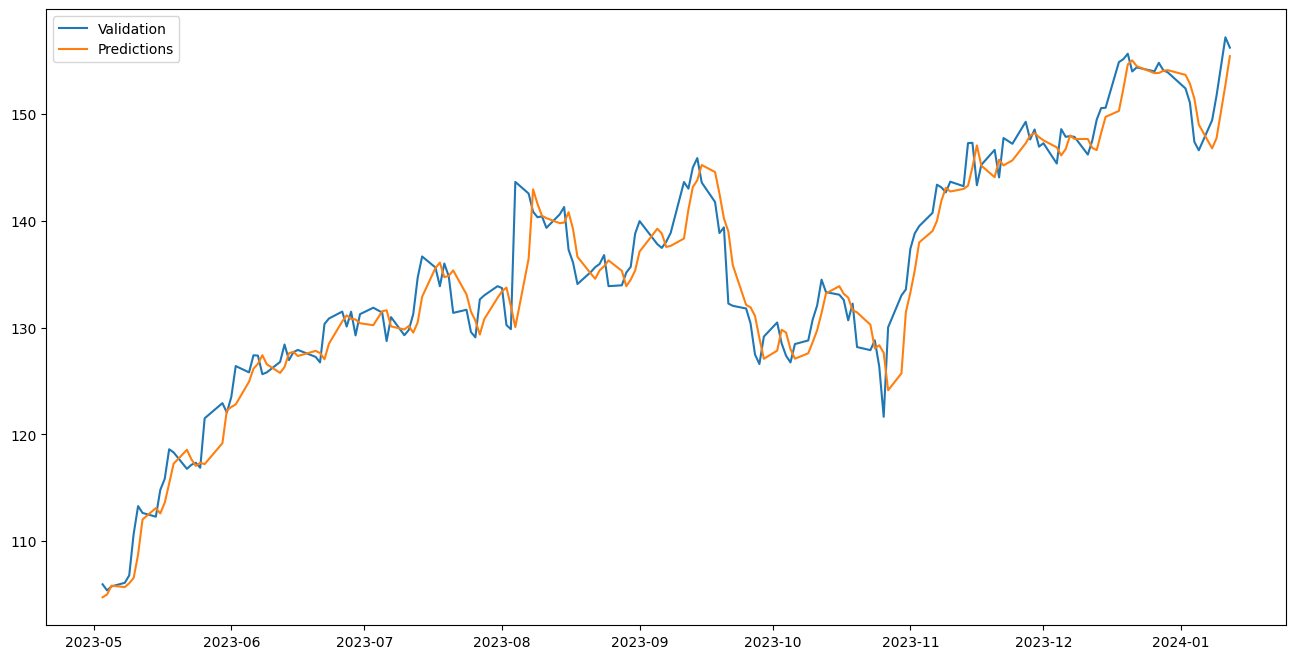

In [ ]:
valid = pd.DataFrame(train_Ama[train_len:])
valid['Predictions']=lstm_valid_pred
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

Data frame to see the percentage of error between real and predicted

In [ ]:
variance = []
for i in range(len(valid)):

  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

<ipython-input-32-f691345f064d>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  variance.append(valid['High'][i]-valid['Predictions'][i])


,0
count,176.000000
mean,0.525881
std,2.512860
min,-6.750351
25%,-1.099892
50%,0.583607
75%,2.071972
max,13.591293


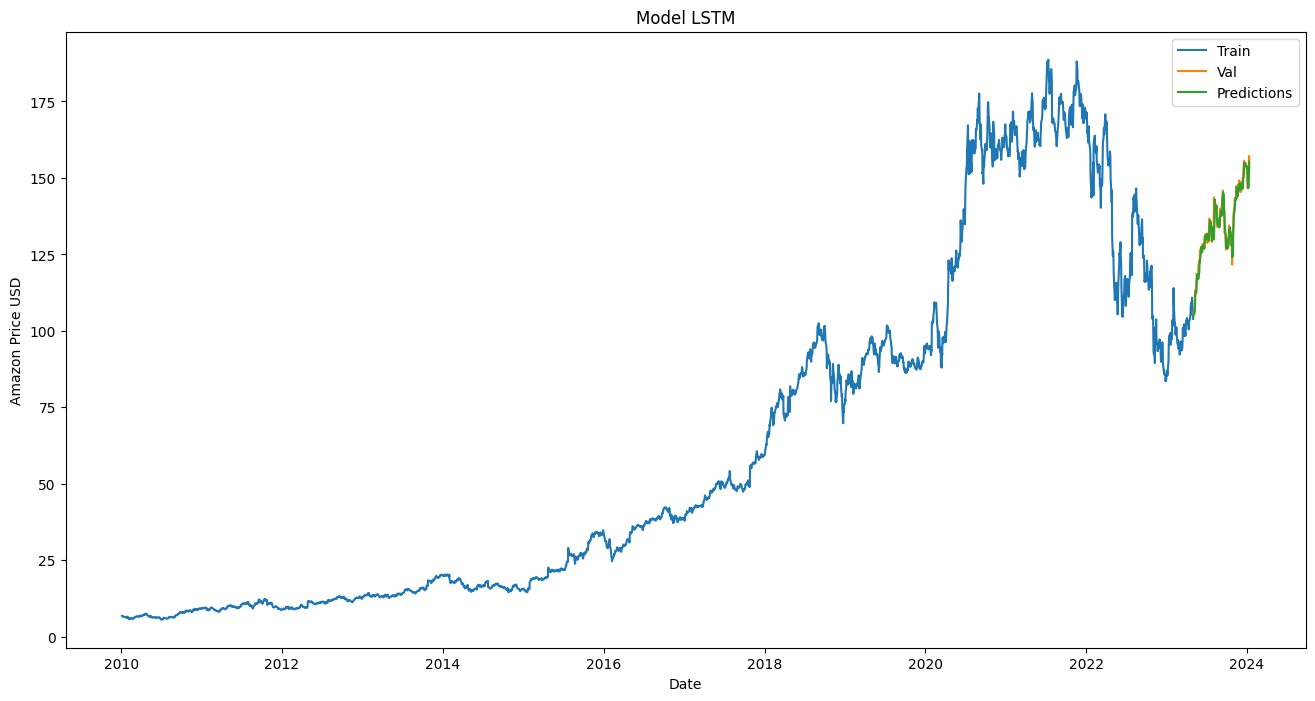

In [ ]:
train = train_Ama[:train_len]
valid = pd.DataFrame(train_Ama[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Amazon Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

In [ ]:
mae = mean_absolute_error(Y_val, prediction)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 1.9154798767783425
